[KRITIK AGARWAL 19BBTCS067](https://github.com/Kritik007)

Deep Learning Lab Experiment 7

Neural Network: Write a program to implement the advanced fraud prediction using neural network

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd 
import keras
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
df['Amount(Normalized)'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df.iloc[:,[29,31]].head()

,Amount,Amount(Normalized)
0,149.62,0.244964
1,2.69,-0.342475
2,378.66,1.160686
3,123.50,0.140534
4,69.99,-0.073403


In [ ]:
df = df.drop(columns = ['Amount', 'Time'], axis=1) # This columns are not necessary anymore.

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# We are transforming data to numpy array to implementing with keras
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential([
    Dense(units=20, input_dim = X_train.shape[1], activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(units=20,activation='relu'),
    Dense(units=24,activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                600       
                                                                 
 dense_1 (Dense)             (None, 24)                504       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2,133
Trainable params: 2,133
Non-trainabl

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=30, epochs=5)

Epoch 1/5
6646/6646 [==============================] - 29s 4ms/step - loss: 0.0096 - accuracy: 0.9988
Epoch 2/5
6646/6646 [==============================] - 22s 3ms/step - loss: 0.0044 - accuracy: 0.9991
Epoch 3/5
6646/6646 [==============================] - 20s 3ms/step - loss: 0.0039 - accuracy: 0.9993
Epoch 4/5
6646/6646 [==============================] - 22s 3ms/step - loss: 0.0034 - accuracy: 0.9994
Epoch 5/5
6646/6646 [==============================] - 21s 3ms/step - loss: 0.0033 - accuracy: 0.9994


In [ ]:
score = model.evaluate(X_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

2671/2671 [==============================] - 5s 2ms/step - loss: 0.0027 - accuracy: 0.9994
Test Accuracy: 99.94%
Test Loss: 0.002729315310716629


2671/2671 [==============================] - 5s 2ms/step


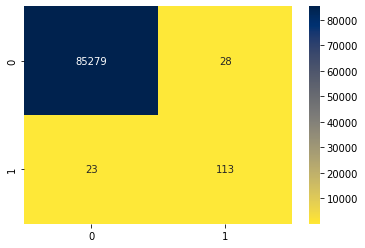

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt='.0f', cmap='cividis_r')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
X_smote, y_smote = SMOTE().fit_resample(X, y)
X_smote = pd.DataFrame(X_smote)
y_smote = pd.DataFrame(y_smote)
y_smote.iloc[:,0].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size = 30, epochs = 5)

Epoch 1/5
13269/13269 [==============================] - 62s 5ms/step - loss: 0.0254 - accuracy: 0.9914
Epoch 2/5
13269/13269 [==============================] - 43s 3ms/step - loss: 0.0106 - accuracy: 0.9973
Epoch 3/5
13269/13269 [==============================] - 43s 3ms/step - loss: 0.0083 - accuracy: 0.9980
Epoch 4/5
13269/13269 [==============================] - 43s 3ms/step - loss: 0.0074 - accuracy: 0.9983
Epoch 5/5
13269/13269 [==============================] - 40s 3ms/step - loss: 0.0066 - accuracy: 0.9985


In [ ]:
score = model.evaluate(X_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

5331/5331 [==============================] - 10s 2ms/step - loss: 0.0058 - accuracy: 0.9985
Test Accuracy: 99.85%
Test Loss: 0.005760796368122101


5331/5331 [==============================] - 9s 2ms/step


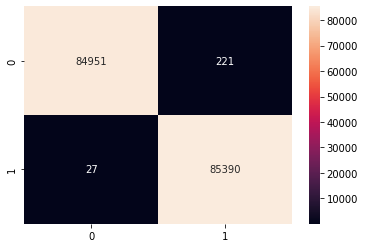

In [ ]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

8901/8901 [==============================] - 17s 2ms/step


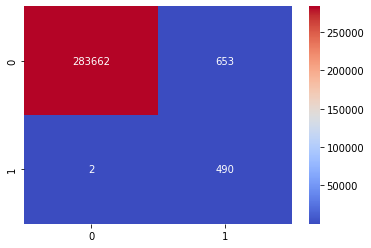

In [ ]:
y_pred2 = model.predict(X)
y_test2 = pd.DataFrame(y)
cm2 = confusion_matrix(y_test2, y_pred2.round())
sns.heatmap(cm2, annot=True, fmt='.0f', cmap='coolwarm')
plt.show()

In [ ]:
scoreNew = model.evaluate(X, y)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(scoreNew[1]*100,scoreNew[0]))

8901/8901 [==============================] - 17s 2ms/step - loss: 0.0089 - accuracy: 0.9977
Test Accuracy: 99.77%
Test Loss: 0.008945759385824203


In [ ]:
print(classification_report(y_test2, y_pred2.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.43      1.00      0.60       492

    accuracy                           1.00    284807
   macro avg       0.71      1.00      0.80    284807
weighted avg       1.00      1.00      1.00    284807

